In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
import math
from scipy import stats

In [3]:
from collections import Counter

def shannon_entropy(img):
    ld = lambda x: math.log(x, 2)
    value_counter = Counter(img)
    N = len(img)
    H = 0
    for count in value_counter.values(): #this gives the counts of values 
        p = float(count)/N
        H = H - p*ld(p)
    return H

In [4]:
#path_1 = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595881637_7/Result_1595881637_7/Result_1595881637_7_80_detected_fingertips_0.jpg"
#path_1 = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595883968_5/Result_1595883968_5/Result_1595883968_5_114_detected_fingertips_1.jpg"
path_1 = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/v16_cropped_fingertips_20200727/TwoFingers_Left_male_adult_white_indoor_adc789750654d2e96cf1dbd9d59b9b6c_06d09f8b-12bc-4ea7-b4b6-7b0b7d345df2_detected_fingertips_1.jpg"
#path_1 = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595889481_File from iOS (3)/Result_1595889481_File from iOS (3)/Result_1595889481_File from iOS (3)_13_detected_fingertips_0.jpg"
path_2 = "/home/lattard/PROJECTS/DATA/fingertip/unbalanced.jpg"
path_3 = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595885260_20200724_181228/Result_1595885260_20200724_181228/Result_1595885260_20200724_181228_108_detected_fingertips_0.jpg"

In [5]:
# explanation of quadrants
#  Q1    :    Q2
#        :
# .................
#  Q3    :   Q4
#        :

# Image 1

Var Q1: 857.7489068226511
Var Q2: 1456.6588852428856
Var Q3: 554.9882239816571
Var Q4: 84.19552227816041
Entropy Q1: 5.855156766247273
Entropy Q2: 5.507687199858171
Entropy Q3: 5.724774047321613
Entropy Q4: 4.688429081366498
Mode Q1: [33]
Mode Q2: [0]
Mode Q3: [38]
Mode Q4: [37]
Variance of quadrant modes: 246.5
(392, 220)
(392, 220)
(392, 220)
(392, 220)


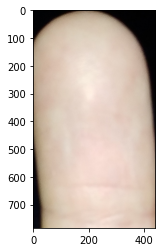

In [18]:
rgb_frame_1 = cv2.imread(path_1)
plt.imshow(rgb_frame_1[...,::-1])

yuv1 = cv2.cvtColor(rgb_frame_1, cv2.COLOR_BGR2HSV)
yuv1_v = yuv1[:,:,1]
#plt.imshow(yuv1_v)
h,w= yuv1_v.shape
q1 = yuv1_v[0:h//2,0:w//2]
q2 = yuv1_v[0:h//2,w//2:]
q3 = yuv1_v[h//2:,0:w//2]
q4 = yuv1_v[h//2:,w//2:]

print("Var Q1:", np.var(q1))
print("Var Q2:", np.var(q2))
print("Var Q3:", np.var(q3))
print("Var Q4:", np.var(q4))

entropy_q1 = shannon_entropy(q1.ravel())
entropy_q2 = shannon_entropy(q2.ravel())
entropy_q3 = shannon_entropy(q3.ravel())
entropy_q4 = shannon_entropy(q4.ravel())
print("Entropy Q1:",entropy_q1)
print("Entropy Q2:",entropy_q2)
print("Entropy Q3:",entropy_q3)
print("Entropy Q4:",entropy_q4)

mode_q1 = stats.mode(q1.ravel())[0]
mode_q2 = stats.mode(q2.ravel())[0]
mode_q3 = stats.mode(q3.ravel())[0]
mode_q4 = stats.mode(q4.ravel())[0]

print("Mode Q1:", mode_q1)
print("Mode Q2:", mode_q2)
print("Mode Q3:", mode_q3)
print("Mode Q4:", mode_q4)

modes = np.array([mode_q1,mode_q2,mode_q3,mode_q4])
print("Variance of quadrant modes:", np.var(modes))

print(q1.shape)
print(q2.shape)
print(q3.shape)
print(q4.shape)


# Image 2

Var Q1: 6810.689089447773
Var Q2: 4119.4238053353365
Var Q3: 6634.475052011414
Var Q4: 4133.893796397487
Entropy Q1: 7.05070444152429
Entropy Q2: 7.079348790276139
Entropy Q3: 7.252410006353467
Entropy Q4: 6.765079984475265
Mode Q1: [11]
Mode Q2: [178]
Mode Q3: [11]
Mode Q4: [1]
Variance of quadrant modes: 5456.6875


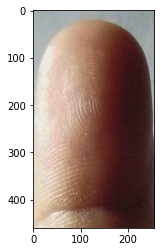

In [19]:
rgb_frame_2 = cv2.imread(path_2)
plt.imshow(rgb_frame_2[...,::-1])
h,w= rgb_frame_2.shape[:2]

yuv2 = cv2.cvtColor(rgb_frame_2, cv2.COLOR_BGR2HSV)
yuv2_v = yuv2[:,:,0]
#plt.imshow(yuv2_v)
q1 = yuv2[0:h//2,0:w//2]
q2 = yuv2[0:h//2,w//2:]
q3 = yuv2[h//2:,0:w//2]
q4 = yuv2[h//2:,w//2:]

print("Var Q1:", np.var(q1))
print("Var Q2:", np.var(q2))
print("Var Q3:", np.var(q3))
print("Var Q4:", np.var(q4))

entropy_q1 = shannon_entropy(q1.ravel())
entropy_q2 = shannon_entropy(q2.ravel())
entropy_q3 = shannon_entropy(q3.ravel())
entropy_q4 = shannon_entropy(q4.ravel())
print("Entropy Q1:",entropy_q1)
print("Entropy Q2:",entropy_q2)
print("Entropy Q3:",entropy_q3)
print("Entropy Q4:",entropy_q4)

mode_q1 = stats.mode(q1.ravel())[0]
mode_q2 = stats.mode(q2.ravel())[0]
mode_q3 = stats.mode(q3.ravel())[0]
mode_q4 = stats.mode(q4.ravel())[0]

print("Mode Q1:", mode_q1)
print("Mode Q2:", mode_q2)
print("Mode Q3:", mode_q3)
print("Mode Q4:", mode_q4)

modes = np.array([mode_q1,mode_q2,mode_q3,mode_q4])
print("Variance of quadrant modes:", np.var(modes))

# Image 3

Var Q1: 453.208499349418
Var Q2: 1909.8790272836286
Var Q3: 476.37592892813205
Var Q4: 1902.5296755095455
Entropy Q1: 5.2681176721554035
Entropy Q2: 7.138174620575765
Entropy Q3: 6.336931766150462
Entropy Q4: 7.071228794463942
Mode Q1: [209]
Mode Q2: [205]
Mode Q3: [169]
Mode Q4: [66]
Variance of quadrant modes: 3330.6875


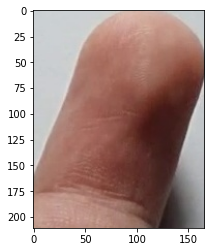

In [20]:
rgb_frame_3 = cv2.imread(path_3)
plt.imshow(rgb_frame_3[...,::-1])
h,w= rgb_frame_3.shape[:2]
yuv3 = cv2.cvtColor(rgb_frame_3, cv2.COLOR_BGR2HSV)
yuv3_v = yuv3[:,:,2]
#plt.imshow(yuv3_v)
q1 = yuv3_v[0:h//2,0:w//2]
q2 = yuv3_v[0:h//2,w//2:]
q3 = yuv3_v[h//2:,0:w//2]
q4 = yuv3_v[h//2:,w//2:]


print("Var Q1:", np.var(q1))
print("Var Q2:", np.var(q2))
print("Var Q3:", np.var(q3))
print("Var Q4:", np.var(q4))

entropy_q1 = shannon_entropy(q1.ravel())
entropy_q2 = shannon_entropy(q2.ravel())
entropy_q3 = shannon_entropy(q3.ravel())
entropy_q4 = shannon_entropy(q4.ravel())
print("Entropy Q1:",entropy_q1)
print("Entropy Q2:",entropy_q2)
print("Entropy Q3:",entropy_q3)
print("Entropy Q4:",entropy_q4)

mode_q1 = stats.mode(q1.ravel())[0]
mode_q2 = stats.mode(q2.ravel())[0]
mode_q3 = stats.mode(q3.ravel())[0]
mode_q4 = stats.mode(q4.ravel())[0]

print("Mode Q1:", mode_q1)
print("Mode Q2:", mode_q2)
print("Mode Q3:", mode_q3)
print("Mode Q4:", mode_q4)

modes = np.array([mode_q1,mode_q2,mode_q3,mode_q4])
print("Variance of quadrant modes:", np.var(modes))

# Lower quadrants orientation check

In [39]:
def crop_image(image: np.ndarray, cropping_area: dict):
    h, w, *_ = image.shape
    (
        min_width_slice,
        max_width_slice,
        min_height_slice,
        max_height_slice,
    ) = _get_slices_for_cropping(h, w, cropping_area)
    return (
        image[min_height_slice:max_height_slice, min_width_slice:max_width_slice],
        min_width_slice,
        min_height_slice,
    )


In [41]:
def _get_slices_for_cropping(img_height: int, img_width: int, cropping_area: dict):
    min_width_slice_fraction, max_width_slice_fraction = cropping_area.get(
        "width", (0, 1)
    )
    min_height_slice_fraction, max_height_slice_fraction = cropping_area.get(
        "height", (0, 1)
    )
    return (
        int(min_width_slice_fraction * img_width),
        int(max_width_slice_fraction * img_width),
        int(min_height_slice_fraction * img_height),
        int(max_height_slice_fraction * img_height),
    )

In [44]:
#skin color range boundaries of the HSV pixel
skin_col_low = np.array([0, 48, 80], dtype="uint8")
skin_col_high = np.array([20, 255, 255], dtype="uint8")

im = yuv1
im = crop_image(im, {"width": (0.1, 0.9), "height": (0, 0.8)})[0]
h,w = im.shape[:2]
im1_q3 = im[h//2:,0:w//2]
im1_q4 = im[h//2:,w//2:]
im1_q3_mean = np.array([im1_q3[:,:,0].mean(), im1_q3[:,:,1].mean(), im1_q3[:,:,2].mean()])
im1_q4_mean = np.array([im1_q4[:,:,0].mean(), im1_q4[:,:,1].mean(), im1_q4[:,:,2].mean()])

print(im1_q3_mean)
print(im1_q4_mean)

print(skin_col_low)



[ 11.77377678  39.1857086  227.38953025]
[  9.87934279  37.53642516 232.21549291]
[ 0 48 80]


In [45]:
skin_im1_q3 = cv2.inRange(im1_q3_mean, skin_col_low.astype(np.float), skin_col_high.astype(np.float))
skin_im1_q4 = cv2.inRange(im1_q4_mean, skin_col_low.astype(np.float), skin_col_high.astype(np.float))
print(skin_im1_q3)
print(skin_im1_q4)


[[255]
 [  0]
 [255]]
[[255]
 [  0]
 [255]]


In [ ]:
h,w = yuv2.shape[:2]
im2_q3 = yuv2[h//2:,0:w//2]
im2_q4 = yuv2[h//2:,w//2:]

h,w = yuv3.shape
im2_q3 = yuv3[h//2:,0:w//2]
im2_q4 = yuv3[h//2:,w//2:]


In [ ]:
#H -image 1 - balanced
hsv1 = cv2.cvtColor(rgb_frame_1, cv2.COLOR_BGR2HSV)
plt.hist(hsv1[0].ravel(),180,[0,180]); plt.show()

In [ ]:
#H -image 2
hsv2 = cv2.cvtColor(rgb_frame_2, cv2.COLOR_BGR2HSV)
plt.hist(hsv2[0].ravel(),180,[0,180]); plt.show()

In [ ]:
#H -image 3
hsv3 = cv2.cvtColor(rgb_frame_3, cv2.COLOR_BGR2HSV)
plt.hist(hsv3[0].ravel(),180,[0,180]); plt.show()

In [ ]:
#S -image 1
plt.hist(hsv1[1].ravel(),256,[0,256]); plt.show()

In [ ]:
#S -image 2
plt.hist(hsv2[1].ravel(),256,[0,256]); plt.show()

In [ ]:
#S -image 3
plt.hist(hsv3[1].ravel(),256,[0,256]); plt.show()

In [ ]:
#V -image 1
plt.hist(hsv1[2].ravel(),256,[0,256]); plt.show()
print(np.var(hsv1[:,:,2]))
entropy1 = shannon_entropy(hsv1[:,:,2].ravel())
print(entropy1)

In [ ]:
#V -image 2
plt.hist(hsv2[2].ravel(),256,[0,256]); plt.show()
print(np.var(hsv2[:,:,2]))
entropy2 = shannon_entropy(hsv2[:,:,2].ravel())
print(entropy2)

In [ ]:
#V -image 3
plt.hist(hsv3[2].ravel(),256,[0,256]); plt.show()
print(np.var(hsv3[:,:,2]))
entropy3 = shannon_entropy(hsv3[:,:,2].ravel())
print(entropy3)

# Grayscale

In [ ]:
gray1 = cv2.cvtColor(rgb_frame_1, cv2.COLOR_BGR2GRAY)
plt.hist(gray1.ravel(),256,[0,256]); plt.show()

In [ ]:
gray2 = cv2.cvtColor(rgb_frame_2, cv2.COLOR_BGR2GRAY)
plt.hist(gray2.ravel(),256,[0,256]); plt.show()

In [65]:
import numpy.ma as ma
a = np.array([[10,2,3],[4,500,6]])
mask = np.array([[1,1,1], [1,1,1]])
s=ma.var(ma.masked_array(a,np.logical_not(mask)))
print(s)

34037.916666666664
